# Problem Statement

Welcome to your first week of work at the Disease And Treatment Agency, division of Societal Cures In Epidemiology and New Creative Engineering (DATA-SCIENCE). Time to get to work!

Due to the recent epidemic of West Nile Virus in the Windy City, we've had the Department of Public Health set up a surveillance and control system. We're hoping it will let us learn something from the mosquito population as we collect data over time. Pesticides are a necessary evil in the fight for public health and safety, not to mention expensive! We need to derive an effective plan to deploy pesticides throughout the city, and that is exactly where you come in!

# Imports and Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

%matplotlib inline

In [2]:
train = pd.read_csv('./assets/train.csv')
test = pd.read_csv('./assets/test.csv')
weather = pd.read_csv('./assets/weather.csv')
spray = pd.read_csv('./assets/spray.csv')

In [3]:
def clean_data(row):
    if ('M' in row) | ('T' in row):
        row = np.nan  # to impute
    return row

In [4]:
def adjust_columns(df):
    df.columns = df.columns.str.lower()
    
    df['date'] = pd.to_datetime(df['date'])
    df['day'] = df['date'].dt.day
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    return df

# Data Cleaning

In [5]:
train = adjust_columns(train)
test = adjust_columns(test)
weather = adjust_columns(weather)
spray = adjust_columns(spray)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    10506 non-null  datetime64[ns]
 1   address                 10506 non-null  object        
 2   species                 10506 non-null  object        
 3   block                   10506 non-null  int64         
 4   street                  10506 non-null  object        
 5   trap                    10506 non-null  object        
 6   addressnumberandstreet  10506 non-null  object        
 7   latitude                10506 non-null  float64       
 8   longitude               10506 non-null  float64       
 9   addressaccuracy         10506 non-null  int64         
 10  nummosquitos            10506 non-null  int64         
 11  wnvpresent              10506 non-null  int64         
 12  day                     10506 non-null  int64 

In [7]:
train.head()

date                                            address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2 2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  species  block           street  trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              addressnumberandstreet   latitude  longitude  addressaccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   

   nummosquitos  wnvpresent  day  month  year  
0             1           0   29      5  2007  
1             1           0   29      5  2007  
2             1           0   29      5  2007  
3             1           0   29      5  2007  
4             4           0   29      5  2007

In [8]:
train['species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'CULEX ERRATICUS'], dtype=object)

In [9]:
train['trap'].unique()

array(['T002', 'T007', 'T015', 'T045', 'T046', 'T048', 'T049', 'T050',
       'T054', 'T086', 'T091', 'T094', 'T096', 'T129', 'T143', 'T148',
       'T153', 'T159', 'T009', 'T011', 'T016', 'T019', 'T025', 'T028',
       'T031', 'T033', 'T089', 'T090', 'T092', 'T135', 'T141', 'T142',
       'T145', 'T146', 'T147', 'T149', 'T150', 'T151', 'T152', 'T154',
       'T158', 'T162', 'T218', 'T220', 'T001', 'T003', 'T006', 'T008',
       'T012', 'T034', 'T037', 'T040', 'T043', 'T047', 'T051', 'T085',
       'T088', 'T161', 'T219', 'T013', 'T014', 'T018', 'T030', 'T084',
       'T144', 'T160', 'T005', 'T017', 'T044', 'T095', 'T004', 'T035',
       'T036', 'T039', 'T060', 'T061', 'T062', 'T065', 'T066', 'T067',
       'T069', 'T070', 'T071', 'T073', 'T074', 'T075', 'T076', 'T077',
       'T079', 'T080', 'T081', 'T082', 'T083', 'T114', 'T155', 'T063',
       'T115', 'T138', 'T200', 'T206', 'T209', 'T212', 'T215', 'T107',
       'T128', 'T072', 'T078', 'T097', 'T099', 'T100', 'T102', 'T103',
      

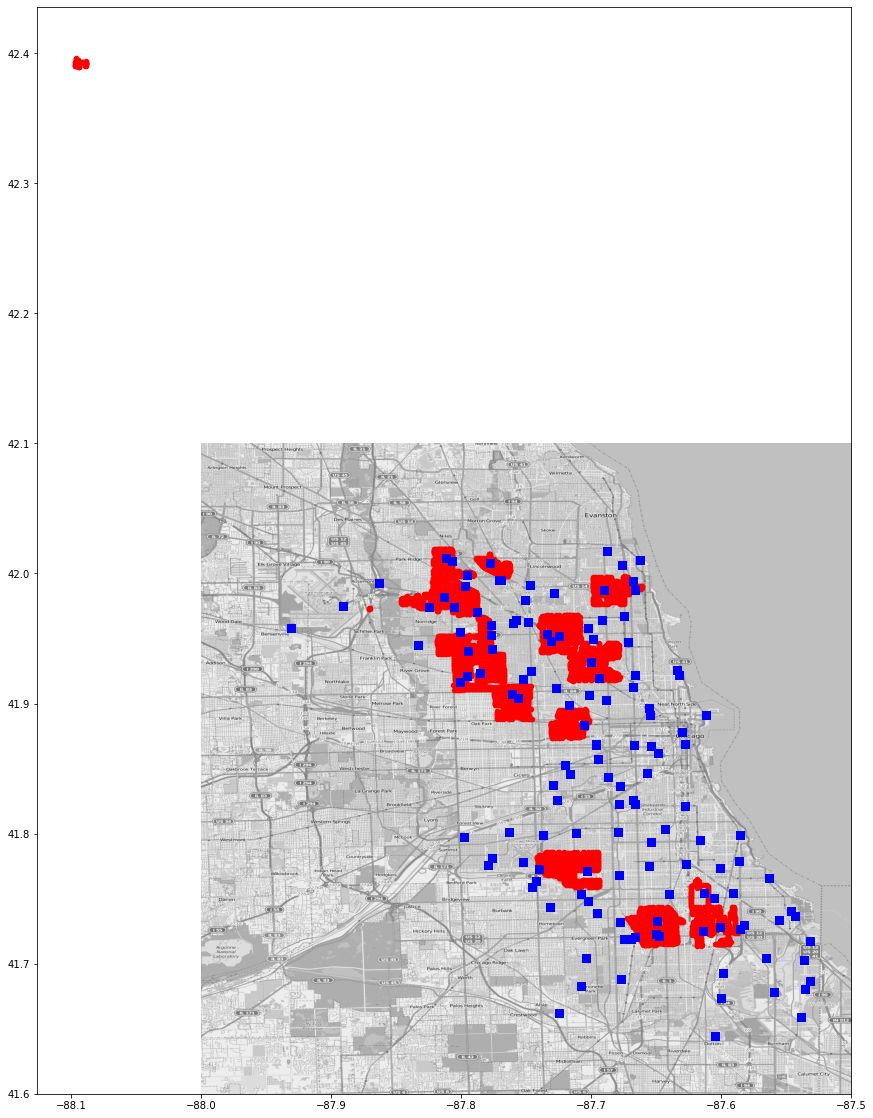

In [10]:
train_longs = train['longitude']
train_lats = train['latitude']

spray_longs = spray['longitude']
spray_lats = spray['latitude']
plt.figure(figsize=(15,20))
origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
upperRight = [42.1, -87.5]          # lat/long of upper right corner

mapdata = np.loadtxt("./assets/mapdata_copyright_openstreetmap_contributors.txt")

intersection = [41.909614, -87.746134]  # co-ordinates of intersection of IL64 / IL50 according to Google Earth


# generate plot
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
plt.scatter(x=spray_longs, y=spray_lats, c='r', s=20)
plt.scatter(x=train_longs, y=train_lats, c='b', s=60, marker='s')

#plt.show()
#plt.savefig('map.png')

## Data Cleaning for Train

In [11]:
train['month'].value_counts(normalize=True)

8     0.357034
7     0.248049
9     0.211117
6     0.149534
10    0.026271
5     0.007995
Name: month, dtype: float64

In [12]:
train['addressaccuracy'].value_counts(normalize=True)

8    0.440510
9    0.378831
5    0.171997
3    0.008662
Name: addressaccuracy, dtype: float64

In [13]:
train[train['nummosquitos'] == 50].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 293 to 10267
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    1019 non-null   datetime64[ns]
 1   address                 1019 non-null   object        
 2   species                 1019 non-null   object        
 3   block                   1019 non-null   int64         
 4   street                  1019 non-null   object        
 5   trap                    1019 non-null   object        
 6   addressnumberandstreet  1019 non-null   object        
 7   latitude                1019 non-null   float64       
 8   longitude               1019 non-null   float64       
 9   addressaccuracy         1019 non-null   int64         
 10  nummosquitos            1019 non-null   int64         
 11  wnvpresent              1019 non-null   int64         
 12  day                     1019 non-null   int64

In [14]:
train[train['addressaccuracy'] == 3]

date           address                 species  block  \
69    2007-06-05  Chicago, IL, USA          CULEX RESTUANS     43   
127   2007-06-26  Chicago, IL, USA          CULEX RESTUANS     43   
179   2007-06-29  Chicago, IL, USA          CULEX RESTUANS     43   
237   2007-07-02  Chicago, IL, USA        CULEX SALINARIUS     43   
342   2007-07-11  Chicago, IL, USA  CULEX PIPIENS/RESTUANS     43   
...          ...               ...                     ...    ...   
10049 2013-09-06  Chicago, IL, USA  CULEX PIPIENS/RESTUANS     43   
10050 2013-09-06  Chicago, IL, USA           CULEX PIPIENS     43   
10191 2013-09-12  Chicago, IL, USA  CULEX PIPIENS/RESTUANS     43   
10326 2013-09-19  Chicago, IL, USA           CULEX PIPIENS     43   
10433 2013-09-26  Chicago, IL, USA           CULEX PIPIENS     43   

                        street  trap  \
69      N ASHLAND AVE OVERPASS  T145   
127     N ASHLAND AVE OVERPASS  T145   
179     N ASHLAND AVE OVERPASS  T145   
237     N ASHLAND AVE OVERPASS  T145   
342     N ASHLAND AVE OVERPASS  T145   
...                        ...   ...   
10049   N ASHLAND AVE OVERPASS  T145   
10050   N ASHLAND AVE OVERPASS  T145   
10191   N ASHLAND AVE OVERPASS  T145   
10326   N ASHLAND AVE OVERPASS  T145   
10433   N ASHLAND AVE OVERPASS  T145   

                          addressnumberandstreet   latitude  longitude  \
69     4300  N ASHLAND AVE OVERPASS, Chicago, IL  41.878114 -87.629798   
127    4300  N ASHLAND AVE OVERPASS, Chicago, IL  41.878114 -87.629798   
179    4300  N ASHLAND AVE OVERPASS, Chicago, IL  41.878114 -87.629798   
237    4300  N ASHLAND AVE OVERPASS, Chicago, IL  41.878114 -87.629798   
342    4300  N ASHLAND AVE OVERPASS, Chicago, IL  41.878114 -87.629798   
...                                          ...        ...        ...   
10049  4300  N ASHLAND AVE OVERPASS, Chicago, IL  41.878114 -87.629798   
10050  4300  N ASHLAND AVE OVERPASS, Chicago, IL  41.878114 -87.629798   
10191  4300  N ASHLAND AVE OVERPASS, Chicago, IL  41.878114 -87.629798   
10326  4300  N ASHLAND AVE OVERPASS, Chicago, IL  41.878114 -87.629798   
10433  4300  N ASHLAND AVE OVERPASS, Chicago, IL  41.878114 -87.629798   

       addressaccuracy  nummosquitos  wnvpresent  day  month  year  
69                   3             3           0    5      6  2007  
127                  3             1           0   26      6  2007  
179                  3             1           0   29      6  2007  
237                  3             1           0    2      7  2007  
342                  3             3           0   11      7  2007  
...                ...           ...         ...  ...    ...   ...  
10049                3            10           0    6      9  2013  
10050                3            27           0    6      9  2013  
10191                3             1           0   12      9  2013  
10326                3             9           0   19      9  2013  
10433                3             2           0   26      9  2013  

[91 rows x 15 columns]

In [15]:
train.duplicated().sum()

813

In [16]:
train.loc[train['nummosquitos'] != 50, :].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9487 entries, 0 to 10505
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    9487 non-null   datetime64[ns]
 1   address                 9487 non-null   object        
 2   species                 9487 non-null   object        
 3   block                   9487 non-null   int64         
 4   street                  9487 non-null   object        
 5   trap                    9487 non-null   object        
 6   addressnumberandstreet  9487 non-null   object        
 7   latitude                9487 non-null   float64       
 8   longitude               9487 non-null   float64       
 9   addressaccuracy         9487 non-null   int64         
 10  nummosquitos            9487 non-null   int64         
 11  wnvpresent              9487 non-null   int64         
 12  day                     9487 non-null   int64  

In [17]:
train_clean = train.drop_duplicates(subset = ['date', 'species', 'latitude', 'longitude', 'address', 'trap','nummosquitos','wnvpresent'], keep = 'first')
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9693 entries, 0 to 10505
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    9693 non-null   datetime64[ns]
 1   address                 9693 non-null   object        
 2   species                 9693 non-null   object        
 3   block                   9693 non-null   int64         
 4   street                  9693 non-null   object        
 5   trap                    9693 non-null   object        
 6   addressnumberandstreet  9693 non-null   object        
 7   latitude                9693 non-null   float64       
 8   longitude               9693 non-null   float64       
 9   addressaccuracy         9693 non-null   int64         
 10  nummosquitos            9693 non-null   int64         
 11  wnvpresent              9693 non-null   int64         
 12  day                     9693 non-null   int64  

In [18]:
train_clean.groupby(['date','address','species','block','street','trap','addressnumberandstreet','latitude','longitude','addressaccuracy','wnvpresent','day','month','year']).sum().reset_index().head()

date                                           address  \
0 2007-05-29       1100 Roosevelt Road, Chicago, IL 60608, USA   
1 2007-05-29       1100 Roosevelt Road, Chicago, IL 60608, USA   
2 2007-05-29  1100 South Peoria Street, Chicago, IL 60608, USA   
3 2007-05-29  1100 West Chicago Avenue, Chicago, IL 60642, USA   
4 2007-05-29    1500 North Long Avenue, Chicago, IL 60651, USA   

                  species  block        street  trap  \
0  CULEX PIPIENS/RESTUANS     11   W ROOSEVELT  T048   
1          CULEX RESTUANS     11   W ROOSEVELT  T048   
2          CULEX RESTUANS     11   S PEORIA ST  T091   
3          CULEX RESTUANS     11     W CHICAGO  T049   
4          CULEX RESTUANS     15    N LONG AVE  T153   

           addressnumberandstreet   latitude  longitude  addressaccuracy  \
0  1100  W ROOSEVELT, Chicago, IL  41.867108 -87.654224                8   
1  1100  W ROOSEVELT, Chicago, IL  41.867108 -87.654224                8   
2  1100  S PEORIA ST, Chicago, IL  41.862292 -87.648860                8   
3    1100  W CHICAGO, Chicago, IL  41.896282 -87.655232                8   
4   1500  N LONG AVE, Chicago, IL  41.907645 -87.760886                8   

   wnvpresent  day  month  year  nummosquitos  
0           0   29      5  2007             1  
1           0   29      5  2007             2  
2           0   29      5  2007             1  
3           0   29      5  2007             1  
4           0   29      5  2007             1

In [19]:
train_clean = train_clean.groupby(['date','address','species','block','street','trap','addressnumberandstreet','latitude','longitude','addressaccuracy','wnvpresent','day','month','year']).sum().reset_index()

Mosquito count capped at 50, additional mosquitos caught above that are made into a new record.

These records and duplicate records have been deleted.

In [20]:
# train_clean.reset_index(drop = True, inplace = True)

In [21]:
# train_clean.drop(columns = ['address', 'block', 'street', 'addressnumberandstreet'], inplace = True)
# train_clean.drop(columns = ['block'], inplace = True)

Since we already have latitude and longitude, we will drop the other address-related columns:
* nummosquitos
* address
* block
* street
* addressnumberandstreet

## Data Cleaning for Spray

In [22]:
#spray['month'].value_counts(normalize=True)

In [23]:
spray['longitude'].describe()

count    14835.000000
mean       -87.736690
std          0.067292
min        -88.096468
25%        -87.794225
50%        -87.727853
75%        -87.694108
max        -87.586727
Name: longitude, dtype: float64

In [24]:
train['longitude'].describe()

count    10506.000000
mean       -87.699908
std          0.096514
min        -87.930995
25%        -87.760070
50%        -87.694991
75%        -87.627796
max        -87.531635
Name: longitude, dtype: float64

<AxesSubplot:xlabel='longitude'>

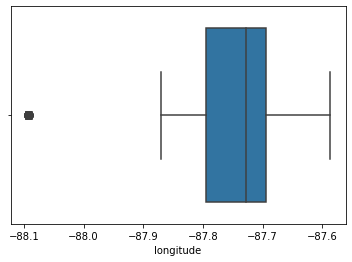

In [25]:
sns.boxplot(data=spray, x='longitude')

In [26]:
spray_clean = spray[spray['longitude'] > -88]

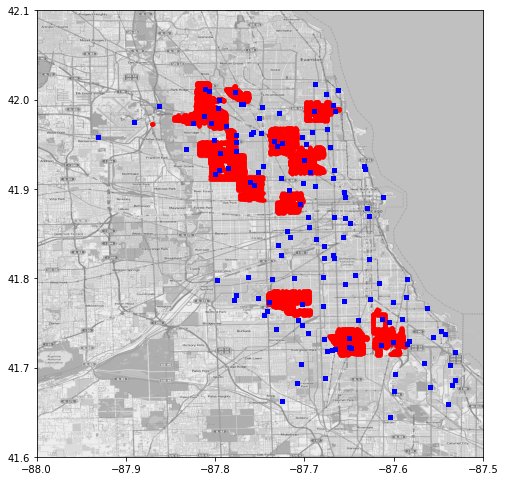

In [27]:
train_longs = train['longitude']
train_lats = train['latitude']

spray_longs = spray_clean['longitude']
spray_lats = spray_clean['latitude']

plt.figure(figsize=(8,10))
origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
upperRight = [42.1, -87.5]          # lat/long of upper right corner

mapdata = np.loadtxt("./assets/mapdata_copyright_openstreetmap_contributors.txt")

intersection = [41.909614, -87.746134]  # co-ordinates of intersection of IL64 / IL50 according to Google Earth


# generate plot
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
plt.scatter(x=spray_longs, y=spray_lats, c='r', s=10)
plt.scatter(x=train_longs, y=train_lats, c='b', s=15, marker='s')

# plt.savefig('map.png')

In [28]:
spray_clean = spray_clean.drop(columns = 'time')

We dropped the time column because time of day was not a concern. As long as the spray occurred 8-10 days prior, it would disrupt the mosquito lifecycle.

Considerations that might change it would be if we knew when precipitation ended. However, as this is not recorded on the weather forecast, we will assume that sprays occurred post-rainfall.

In [29]:
spray.duplicated().sum()

541

In [30]:
spray_cleaned = spray.drop_duplicates(keep = 'first')

## Data Cleaning for Weather

In [31]:
#weather['month'].value_counts(normalize=True)

In [32]:
weather['water1'].value_counts()

M    2944
Name: water1, dtype: int64

In [33]:
weather = weather.drop(columns = 'water1')

In [34]:
# check for missing or trace values based on data dict
weather.isin(['T', 'M']).sum()

station           0
date              0
tmax              0
tmin              0
tavg             11
depart         1472
dewpoint          0
wetbulb           4
heat             11
cool             11
sunrise           0
sunset            0
codesum           0
depth          1472
snowfall       1472
preciptotal       2
stnpressure       4
sealevel          9
resultspeed       0
resultdir         0
avgspeed          3
day               0
month             0
year              0
dtype: int64

### Imputing

####  Depth and Snowfall

In [35]:
weather['depth'].value_counts()

M    1472
0    1472
Name: depth, dtype: int64

In [36]:
weather['snowfall'].value_counts()

M      1472
0.0    1459
  T      12
0.1       1
Name: snowfall, dtype: int64

We will drop both depth and snowfall since most values are missing, 0 or trace.

In [37]:
weather.drop(columns = ['depth', 'snowfall'], inplace = True)

In [38]:
weather[['station','date','sunrise', 'sunset']]

station       date sunrise sunset
0           1 2007-05-01    0448   1849
1           2 2007-05-01       -      -
2           1 2007-05-02    0447   1850
3           2 2007-05-02       -      -
4           1 2007-05-03    0446   1851
...       ...        ...     ...    ...
2939        2 2014-10-29       -      -
2940        1 2014-10-30    0622   1649
2941        2 2014-10-30       -      -
2942        1 2014-10-31    0623   1647
2943        2 2014-10-31       -      -

[2944 rows x 4 columns]

#### Sunrise and Sunset

In [39]:
# impute sunrise data with the data in the row above
for n in weather.index:
    if n % 2 == 1:
        weather['sunrise'][n] = weather['sunrise'][n-1]

<ipython-input-39-b0dc24ae8234>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['sunrise'][n] = weather['sunrise'][n-1]


In [40]:
# impute sunset data with the data in the row above
for n in weather.index:
    if n % 2 == 1:
        weather['sunset'][n] = weather['sunset'][n-1]

<ipython-input-40-d40f2b359dc5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['sunset'][n] = weather['sunset'][n-1]


In [41]:
# convert sunrise and sunset columns to numbers
weather['sunrise'] = weather['sunrise'].astype(int)
weather['sunset'] = weather['sunset'].astype(int)

In [42]:
# to convert sunrise and sunset into number of mins from start of day
# subsequently we can feature engineer with total sunlight time (sunset - sunrise)
def get_duration(sun_time):
    hours = sun_time // 100  # hour value
    mins = sun_time % 100   # min value
    total_mins = hours * 60 + mins
    return total_mins

In [43]:
weather['sunrise_dur'] = weather['sunrise'].apply(get_duration)
weather['sunset_dur'] = weather['sunset'].apply(get_duration)

#### Average Temperature

In [44]:
def impute_tavg(row):
    if row['tavg'] == 'M':
        row['tavg'] = round((row['tmax'] + row['tmin']) / 2) 
    return row

In [45]:
weather = weather.apply(impute_tavg, axis=1)

In [46]:
weather['tavg'] = weather['tavg'].astype(int)

#### Heat and Cool

In [47]:
for row in weather.index:
    avg_temp = weather['tavg'][row] - 65
    if avg_temp >= 0:
        weather['cool'][row] = avg_temp
        weather['heat'][row] = 0
    if avg_temp < 0:
        weather['heat'][row] = abs(avg_temp)
        weather['cool'][row] = 0        

<ipython-input-47-2eeee7d08e47>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['cool'][row] = avg_temp
<ipython-input-47-2eeee7d08e47>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['heat'][row] = 0
<ipython-input-47-2eeee7d08e47>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['heat'][row] = abs(avg_temp)
<ipython-input-47-2eeee7d08e47>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

#### Departure from Norm

In [48]:
weather.loc[weather['depart'].str.contains('M')].head(20)

station       date  tmax  tmin  tavg depart  dewpoint wetbulb heat cool  \
1         2 2007-05-01    84    52    68      M        51      57    0    3   
3         2 2007-05-02    60    43    52      M        42      47   13    0   
5         2 2007-05-03    67    48    58      M        40      50    7    0   
7         2 2007-05-04    78    51    64      M        42      50    1    0   
9         2 2007-05-05    66    54    60      M        39      50    5    0   
11        2 2007-05-06    68    52    60      M        30      46    5    0   
13        2 2007-05-07    84    50    67      M        39      53    0    2   
15        2 2007-05-08    80    60    70      M        57      63    0    5   
17        2 2007-05-09    76    63    70      M        60      63    0    5   
19        2 2007-05-10    83    59    71      M        52      61    0    6   
21        2 2007-05-11    73    49    61      M        44      51    4    0   
23        2 2007-05-12    65    47    56      M        37      46    9    0   
25        2 2007-05-13    69    44    57      M        32      46    8    0   
27        2 2007-05-14    90    54    72      M        45      58    0    7   
29        2 2007-05-15    82    56    69      M        56      61    0    4   
31        2 2007-05-16    64    45    55      M        42      47   10    0   
33        2 2007-05-17    61    44    53      M        32      43   12    0   
35        2 2007-05-18    70    43    57      M        31      47    8    0   
37        2 2007-05-19    80    56    68      M        37      53    0    3   
39        2 2007-05-20    69    44    57      M        41      45    8    0   

    sunrise  sunset     codesum preciptotal stnpressure sealevel  resultspeed  \
1       448    1849                    0.00       29.18    29.82          2.7   
3       447    1850       BR HZ        0.00       29.44    30.08         13.3   
5       446    1851          HZ        0.00       29.46    30.12         12.9   
7       444    1852                    0.00       29.36    30.04         10.1   
9       443    1853                       T       29.46    30.09         11.2   
11      442    1855                    0.00       29.62    30.28         13.8   
13      441    1856                    0.00       29.44    30.12          8.5   
15      439    1857          HZ           T       29.36    30.02          2.5   
17      438    1858       BR HZ        0.02       29.28    29.93          3.9   
19      437    1859       BR HZ        0.00       29.26    29.91          2.0   
21      436    1860                    0.00       29.39    30.03         11.7   
23      435    1901                    0.00       29.54    30.19         12.7   
25      434    1902                    0.00       29.55    30.24          6.4   
27      433    1903                    0.00       29.31    29.98         14.1   
29      432    1904  TSRA RA BR        0.60       29.19    29.83          8.1   
31      431    1905       RA BR        0.07       29.39    30.03          8.0   
33      430    1906                    0.00       29.62    30.27         11.7   
35      429    1907                    0.00       29.60    30.26          3.4   
37      428    1908                    0.00       29.41    30.08         11.1   
39      427    1909     TSRA RA        0.11       29.44    30.11          8.6   

    resultdir avgspeed  day  month  year  sunrise_dur  sunset_dur  
1          25      9.6    1      5  2007          288        1129  
3           2     13.4    2      5  2007          287        1130  
5           6     13.2    3      5  2007          286        1131  
7           7     10.4    4      5  2007          284        1132  
9           7     11.5    5      5  2007          283        1133  
11         10     14.5    6      5  2007          282        1135  
13         17      9.9    7      5  2007          281        1136  
15          8      5.4    8      5  2007          279        1137  
17          7      5.9    9   

In [49]:
weather.loc[(weather['depart'].str.contains('M')) &
            (weather['station'] == 1)]

Empty DataFrame
Columns: [station, date, tmax, tmin, tavg, depart, dewpoint, wetbulb, heat, cool, sunrise, sunset, codesum, preciptotal, stnpressure, sealevel, resultspeed, resultdir, avgspeed, day, month, year, sunrise_dur, sunset_dur]
Index: []

We see that all the missing values in the Depart column are found in Station 2 only.

Based on the data dictionary, Depart means the departure from normal temperature.

In order to impute the missing values here, we suggest to:
1. Take the 'Tavg' difference between both stations for each day 
2. Add this difference to the Station 1's 'Depart' value to calculate Station 2's 'Depart' value

In [50]:
weather.loc[[1], 'depart']

1    M
Name: depart, dtype: object

In [51]:
def impute_depart(row):
    if row['station'] == 2:
        diff = row['tavg'] - int(weather.loc[(weather['date'] == row['date']) &
                                         (weather['station'] == 1),
                                         'tavg'])
        
        row['depart'] = diff + int(weather.loc[(weather['date'] == row['date']) &
                                           (weather['station'] == 1), 
                                           'depart'])
        
    return row

In [52]:
weather = weather.apply(impute_depart, axis=1)

In [53]:
weather['depart'] = weather['depart'].map(lambda x: float(x))

#### Wetbulb

In [54]:
def check_value(df, col, station_1_idx):
    if ((df.loc[station_1_idx][col] in ['M','T']) & (df.loc[station_1_idx+1][col] in ['M','T'])):
        return True
    else:
        return False

In [55]:
def impute_data(df, col):
    df_1 = df.loc[(df['station'] == 1) & (~df[col].str.strip().isin(['M','T'])),col].astype(float)
    df_2 = df.loc[(df['station'] == 2) & (~df[col].str.strip().isin(['M','T'])),col].astype(float)
    mean_diff = df_1.mean() - df_2.mean()
    
    idx = list(df.loc[(df[col].str.strip().isin(['M']))].index)
    
    for i in idx:
        if df.loc[i]['station'] == 1:
            if check_value(df, col, i):
                new_val = (float(df.loc[i+2][col]) + float(df.loc[i-2][col])) / 2
                df.at[i,col] = new_val
                df.at[i+1,col] = new_val
                idx.remove(i)
                idx.remove(i+1)
            else:
                df.at[i,col] = float(df.loc[i+1][col]) + mean_diff
        else:
            df.at[i,col] = float(df.loc[i-1][col]) + mean_diff
    
    zero_idx = list(df.loc[(df[col].str.strip().isin(['T']))].index)
    for i in zero_idx:
        df.at[i,col] = 0
        
    df[col] = df[col].map(lambda x: float(x))
    
    return df

In [56]:
weather = impute_data(weather, 'wetbulb')

#### Total Precipitation

In [57]:
weather = impute_data(weather, 'preciptotal')

#### Station Pressure

In [58]:
weather = impute_data(weather, 'stnpressure')

#### Average Speed

In [59]:
weather = impute_data(weather, 'avgspeed')

#### Sea Level

In [60]:
weather = impute_data(weather,'sealevel')

## Vectorizing Weather Phenomena

In [61]:
weather['codesum'].unique()

array([' ', 'BR', 'BR HZ', 'HZ', 'RA', 'RA BR', 'TSRA RA BR', 'RA VCTS',
       'TSRA RA', 'RA HZ', 'TSRA RA BR HZ', 'TSRA BR HZ', 'RA BR HZ VCTS',
       'TSRA RA HZ', 'TSRA BR HZ VCTS', 'TSRA', 'TSRA BR HZ FU',
       'TSRA RA HZ FU', 'BR HZ FU', 'TSRA RA VCTS', 'HZ VCTS', 'TSRA HZ',
       'VCTS', 'RA BR VCTS', 'TSRA RA BR VCTS', 'TS TSRA RA BR HZ VCTS',
       'DZ BR', 'TS TSRA RA BR HZ', 'TS TSRA BR HZ', 'RA BR HZ',
       'TSRA RA DZ BR HZ', 'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA',
       'TS TSRA RA BR VCTS', 'TS TSRA BR', 'TS RA', 'RA BCFG BR',
       'TSRA BR', 'RA DZ FG+ BCFG BR', 'RA FG+ MIFG BR', 'RA DZ',
       'RA DZ BR', 'TS TSRA RA HZ', 'TSRA RA FG+ FG BR',
       'TSRA DZ FG+ FG BR HZ', 'TS BR', 'RA BR SQ', 'TS TSRA',
       'TSRA RA BR HZ VCTS', 'BR VCTS', 'TS', 'FG+ BR HZ', 'RA SN',
       'TSRA RA DZ BR', 'DZ BR HZ', 'RA BR FU', 'TS BR HZ', 'DZ',
       'FG+ BR', 'FG+ FG BR', 'FG+ MIFG BR', 'TSRA RA FG BR',
       'TSRA FG+ BR', 'RA DZ BR HZ', 'RA DZ SN', 'FG+ FG 

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer()
we_types = cvec.fit_transform(weather['codesum'])

In [63]:
we_types = pd.DataFrame(
    we_types.todense(),
    columns = cvec.get_feature_names()
            )

In [64]:
for row in range(len(we_types)):
    if we_types['tsra'][row] == 1:
        we_types['ts'][row] = 1
        we_types['ra'][row] = 1

we_types.drop(columns = 'tsra', inplace = True)

In [65]:
we_types.sum().sort_values(ascending = False)

ra      1035
br       813
ts       345
hz       263
dz       133
fg        43
vcts      19
fu         9
sn         6
bcfg       5
vcfg       4
mifg       3
sq         3
gr         1
dtype: int64

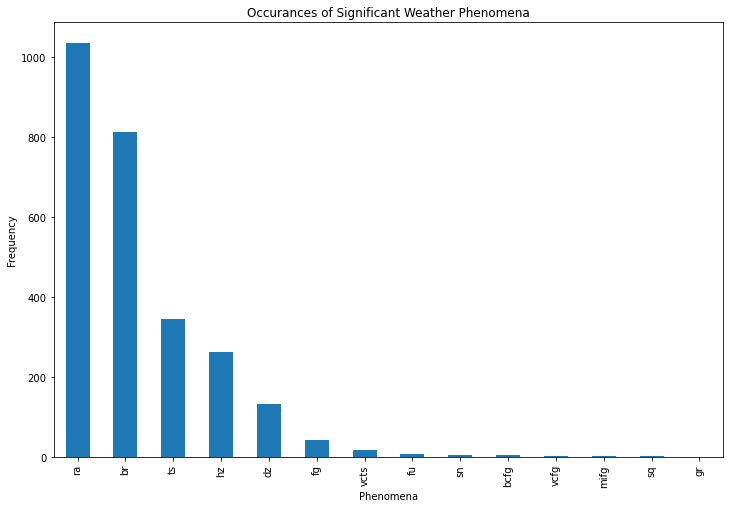

In [66]:
plt.figure(figsize = (12,8))
plt.title('Occurances of Significant Weather Phenomena')
plt.xlabel('Phenomena')
plt.ylabel('Frequency')
we_types.sum().sort_values(ascending = False).plot.bar();

In [67]:
we_types

bcfg  br  dz  fg  fu  gr  hz  mifg  ra  sn  sq  ts  vcfg  vcts
0        0   0   0   0   0   0   0     0   0   0   0   0     0     0
1        0   0   0   0   0   0   0     0   0   0   0   0     0     0
2        0   1   0   0   0   0   0     0   0   0   0   0     0     0
3        0   1   0   0   0   0   1     0   0   0   0   0     0     0
4        0   0   0   0   0   0   0     0   0   0   0   0     0     0
...    ...  ..  ..  ..  ..  ..  ..   ...  ..  ..  ..  ..   ...   ...
2939     0   0   0   0   0   0   0     0   0   0   0   0     0     0
2940     0   0   0   0   0   0   0     0   0   0   0   0     0     0
2941     0   0   0   0   0   0   0     0   1   0   0   0     0     0
2942     0   0   0   0   0   0   0     0   1   1   0   0     0     0
2943     0   1   0   0   0   0   0     0   1   1   0   0     0     0

[2944 rows x 14 columns]

In [68]:
weather.drop(columns = 'codesum', inplace = True)

In [69]:
weather_clean = pd.concat(
    objs = [weather, we_types],
    axis = 1
)

## Numericizing Columns

In [70]:
weather_clean.isin(['M','T']).sum()

station        0
date           0
tmax           0
tmin           0
tavg           0
depart         0
dewpoint       0
wetbulb        0
heat           0
cool           0
sunrise        0
sunset         0
preciptotal    0
stnpressure    0
sealevel       0
resultspeed    0
resultdir      0
avgspeed       0
day            0
month          0
year           0
sunrise_dur    0
sunset_dur     0
bcfg           0
br             0
dz             0
fg             0
fu             0
gr             0
hz             0
mifg           0
ra             0
sn             0
sq             0
ts             0
vcfg           0
vcts           0
dtype: int64

In [71]:
num_list = ['depart', 'wetbulb', 'preciptotal', 'stnpressure', 'sealevel', 'avgspeed']
for col in num_list:
    # weather_clean[col].astype(float)
    weather_clean[col].map(lambda x: x if pd.isnull(x) else float(x))

In [72]:
weather_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   station      2944 non-null   int64         
 1   date         2944 non-null   datetime64[ns]
 2   tmax         2944 non-null   int64         
 3   tmin         2944 non-null   int64         
 4   tavg         2944 non-null   int64         
 5   depart       2944 non-null   float64       
 6   dewpoint     2944 non-null   int64         
 7   wetbulb      2944 non-null   float64       
 8   heat         2944 non-null   int64         
 9   cool         2944 non-null   int64         
 10  sunrise      2944 non-null   int64         
 11  sunset       2944 non-null   int64         
 12  preciptotal  2944 non-null   float64       
 13  stnpressure  2944 non-null   float64       
 14  sealevel     2944 non-null   float64       
 15  resultspeed  2944 non-null   float64       
 16  result

# Exploratory Data Analysis

In [73]:
# train_clean = train_clean.drop(columns=['day','month','year'], axis=1)
# weather_clean = weather_clean.drop(columns=['day','month','year'], axis=1)

In [74]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8610 entries, 0 to 8609
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    8610 non-null   datetime64[ns]
 1   address                 8610 non-null   object        
 2   species                 8610 non-null   object        
 3   block                   8610 non-null   int64         
 4   street                  8610 non-null   object        
 5   trap                    8610 non-null   object        
 6   addressnumberandstreet  8610 non-null   object        
 7   latitude                8610 non-null   float64       
 8   longitude               8610 non-null   float64       
 9   addressaccuracy         8610 non-null   int64         
 10  wnvpresent              8610 non-null   int64         
 11  day                     8610 non-null   int64         
 12  month                   8610 non-null   int64   

In [75]:
comb_df = train_clean.merge(weather_clean, on=['date','day','month','year'])

In [76]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17220 entries, 0 to 17219
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    17220 non-null  datetime64[ns]
 1   address                 17220 non-null  object        
 2   species                 17220 non-null  object        
 3   block                   17220 non-null  int64         
 4   street                  17220 non-null  object        
 5   trap                    17220 non-null  object        
 6   addressnumberandstreet  17220 non-null  object        
 7   latitude                17220 non-null  float64       
 8   longitude               17220 non-null  float64       
 9   addressaccuracy         17220 non-null  int64         
 10  wnvpresent              17220 non-null  int64         
 11  day                     17220 non-null  int64         
 12  month                   17220 non-null  int64 

In [77]:
comb_df.describe().T

count         mean        std          min          25%  \
block            17220.0    38.793380  24.128678    10.000000    14.000000   
latitude         17220.0    41.844422   0.107072    41.644612    41.750498   
longitude        17220.0   -87.695237   0.084918   -87.930995   -87.752411   
addressaccuracy  17220.0     7.936121   1.326656     3.000000     8.000000   
wnvpresent       17220.0     0.053078   0.224195     0.000000     0.000000   
day              17220.0    15.485598   8.747915     1.000000     8.000000   
month            17220.0     7.705459   1.103245     5.000000     7.000000   
year             17220.0  2009.713821   2.338080  2007.000000  2007.000000   
nummosquitos     17220.0    11.494890  20.743216     1.000000     2.000000   
station          17220.0     1.500000   0.500015     1.000000     1.000000   
tmax             17220.0    81.374623   8.400732    57.000000    78.000000   
tmin             17220.0    63.120325   7.742070    41.000000    58.000000   
tavg             17220.0    72.488734   7.616783    50.000000    69.000000   
depart           17220.0     2.984785   6.687780   -12.000000    -2.000000   
dewpoint         17220.0    59.303891   7.971932    38.000000    54.000000   
wetbulb          17220.0    64.401665   6.837181    46.000000    60.000000   
heat             17220.0     0.989547   2.848744     0.000000     0.000000   
cool             17220.0     8.478281   5.754976     0.000000     4.000000   
sunrise          17220.0   469.738328  46.619096   416.000000   427.000000   
sunset           17220.0  1868.086992  65.109023  1720.000000  1826.000000   
preciptotal      17220.0     0.155288   0.397869     0.000000     0.000000   
stnpressure      17220.0    29.281170   0.120215    28.890000    29.200000   
sealevel         17220.0    29.961850   0.119987    29.590000    29.890000   
resultspeed      17220.0     5.990569   2.870579     0.100000     3.900000   
resultdir        17220.0    17.894715   9.261876     1.000000     9.000000   
avgspeed         17220.0     7.502956   2.520162     2.100000     5.800000   
sunrise_dur      17220.0   294.235424  28.752541   256.000000   267.000000   
sunset_dur       17220.0  1132.384321  36.583179  1040.000000  1106.000000   
bcfg             17220.0     0.000000   0.000000     0.000000     0.000000   
br               17220.0     0.286005   0.451905     0.000000     0.000000   
dz               17220.0     0.015970   0.125362     0.000000     0.000000   
fg               17220.0     0.012892   0.112812     0.000000     0.000000   
fu               17220.0     0.000000   0.000000     0.000000     0.000000   
gr               17220.0     0.000000   0.000000     0.000000     0.000000   
hz               17220.0     0.126190   0.332074     0.000000     0.000000   
mifg             17220.0     0.000000   0.000000     0.000000     0.000000   
ra               17220.0     0.323751   0.467920     0.000000     0.000000   
sn               17220.0     0.000000   0.000000     0.000000     0.000000   
sq               17220.0     0.000000   0.000000     0.000000     0.000000   
ts               17220.0     0.162311   0.368747     0.000000     0.000000   
vcfg             17220.0     0.000000   0.000000     0.000000     0.000000   
vcts             17220.0     0.033217   0.179208     0.000000     0.000000   

                         50%          75%          max  
block              37.000000    58.000000    98.000000  
latitude           41.857402    41.944869    42.017430  
longitude         -87.694991   -87.642984   -87.531635  
addressaccuracy     8.000000     9.000000     9.000000  
wnvpresent          0.000000     0.000000     1.000000  
day                15.000000    24.000000    31.000000  
month               8.000000     9.000000    10.000000  
year             2009.000000  2011.000000  2013.000000  
nummosquitos        4.000000    11.000000   254.000000  
station             1.500000     2.000000     2.000000  
tmax               83.000000    87.00

In [78]:
comb_df.columns

Index(['date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'wnvpresent', 'day', 'month', 'year', 'nummosquitos', 'station', 'tmax',
       'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'sunrise', 'sunset', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed', 'sunrise_dur', 'sunset_dur',
       'bcfg', 'br', 'dz', 'fg', 'fu', 'gr', 'hz', 'mifg', 'ra', 'sn', 'sq',
       'ts', 'vcfg', 'vcts'],
      dtype='object')

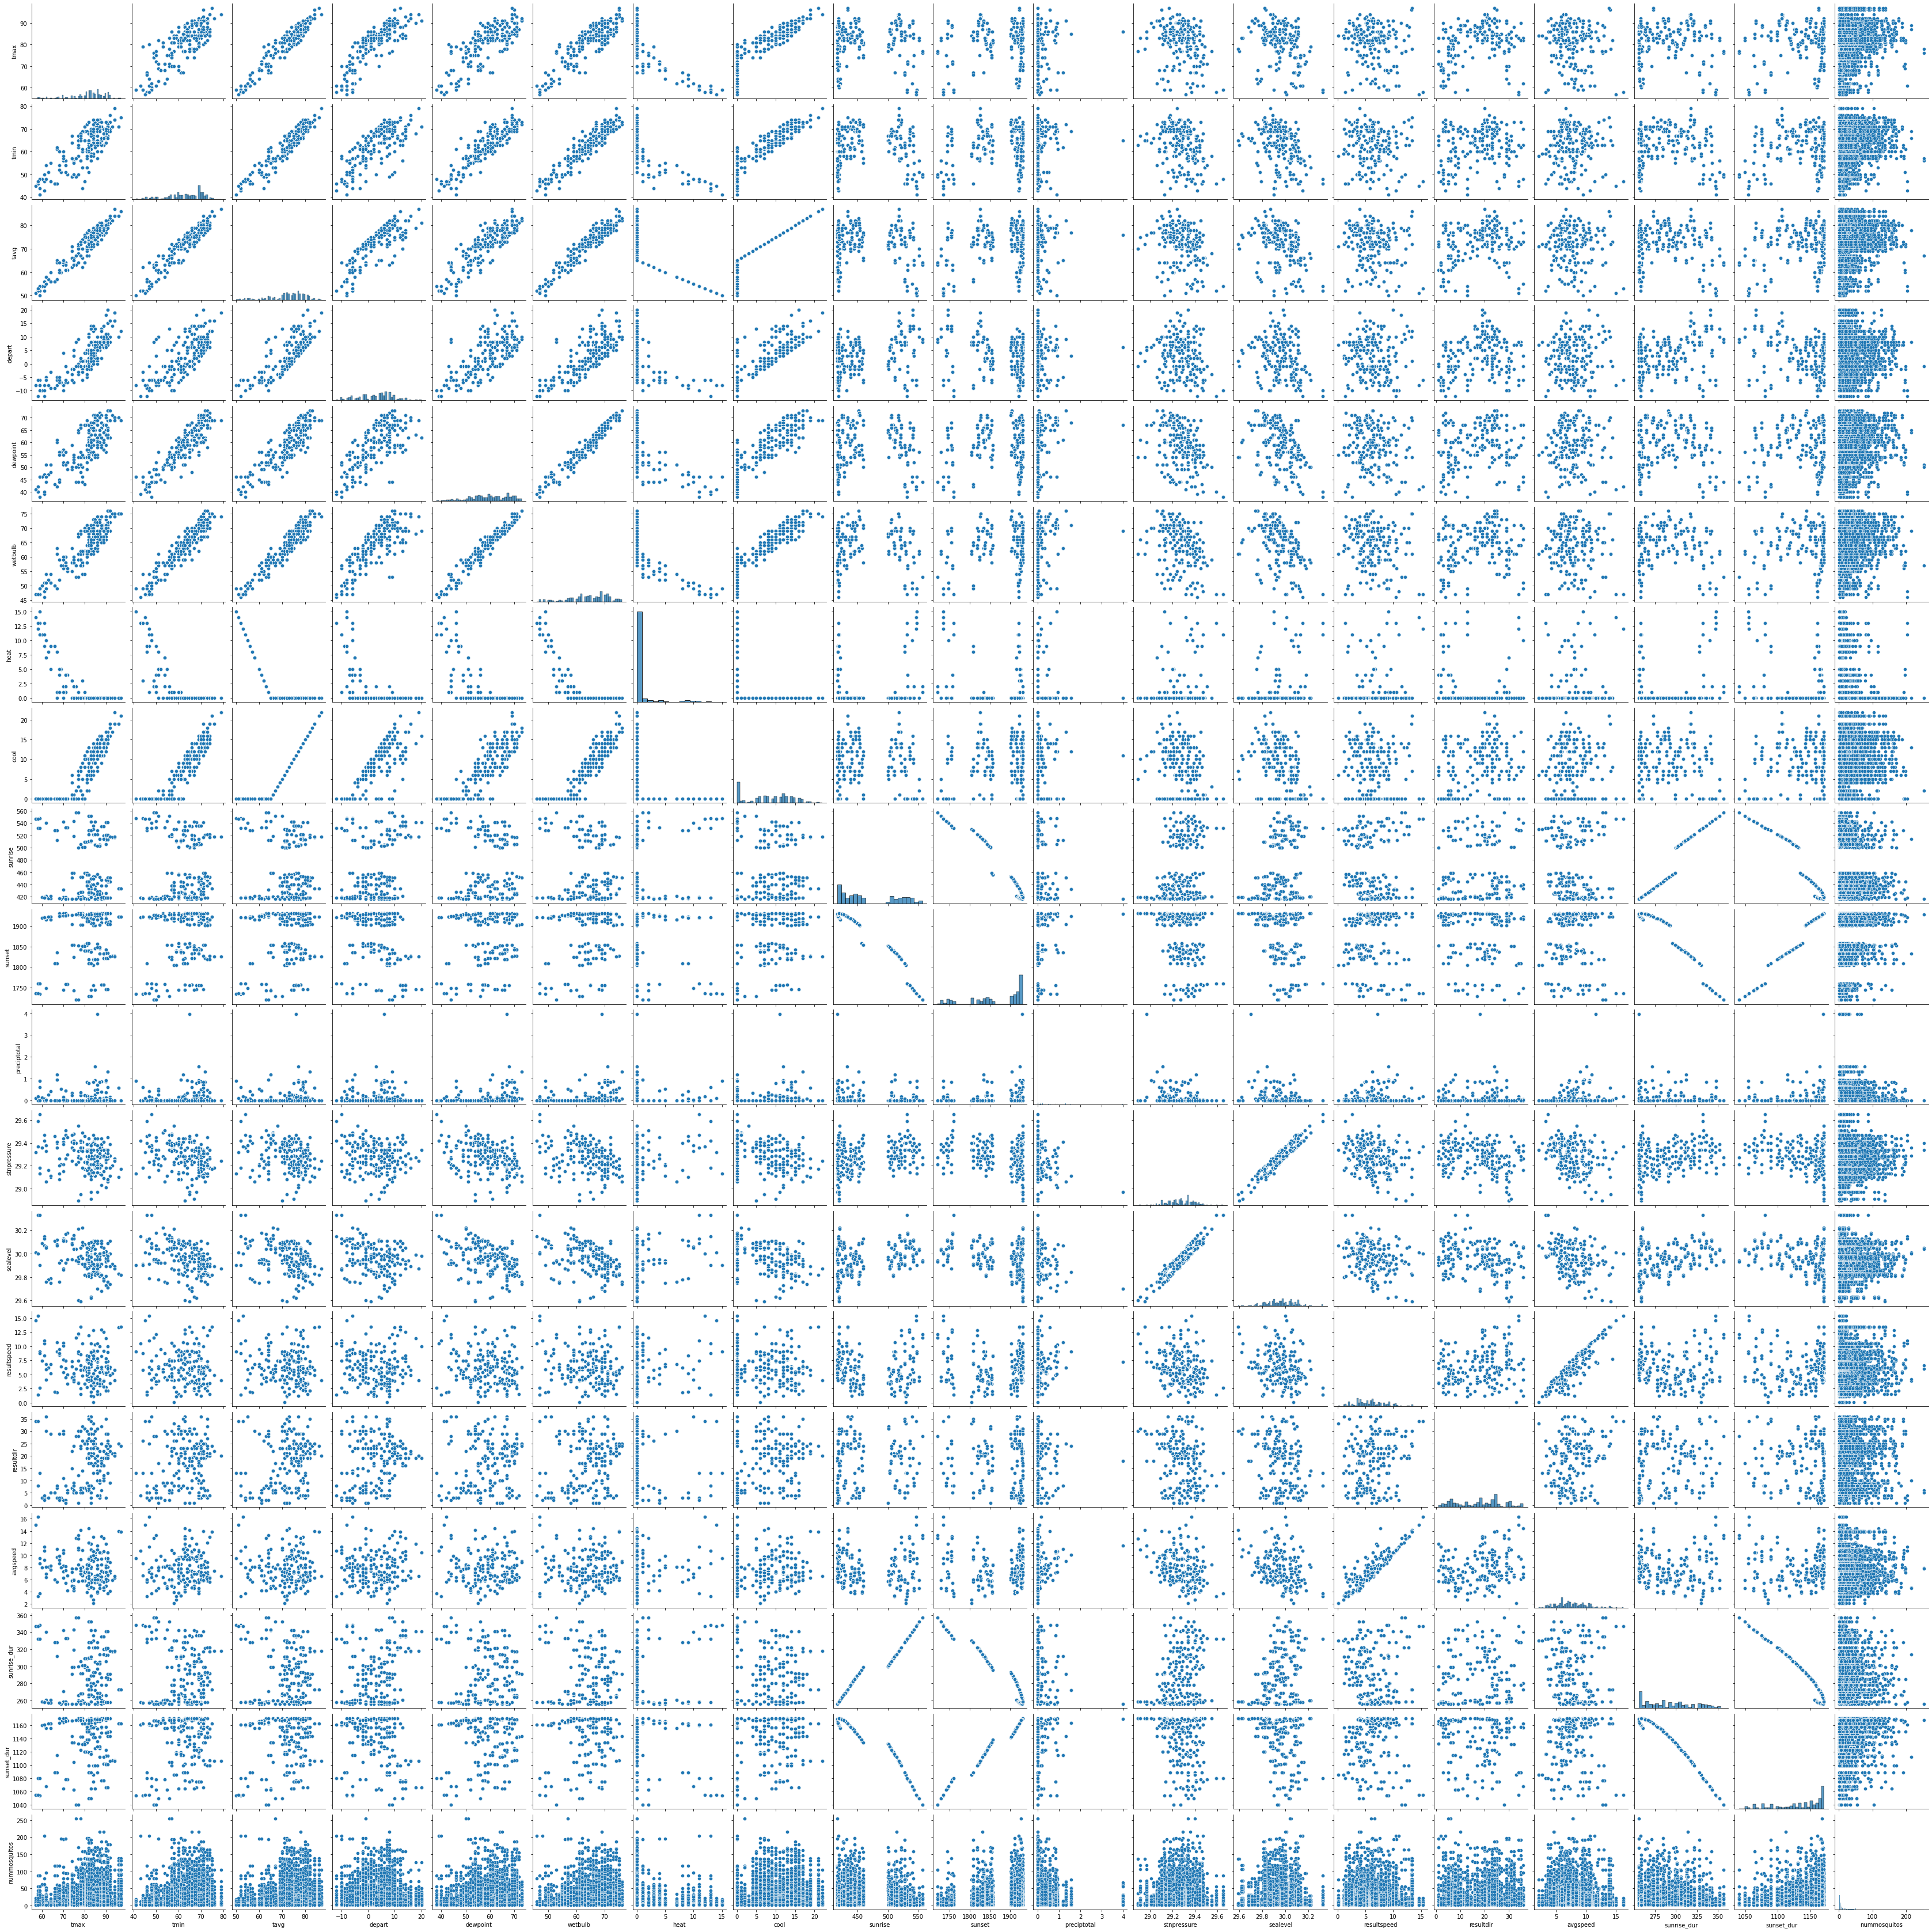

In [79]:
sns.pairplot(comb_df[['species',
       'tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'preciptotal',
       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed',
       'sunrise_dur', 'sunset_dur','nummosquitos']])

<AxesSubplot:>

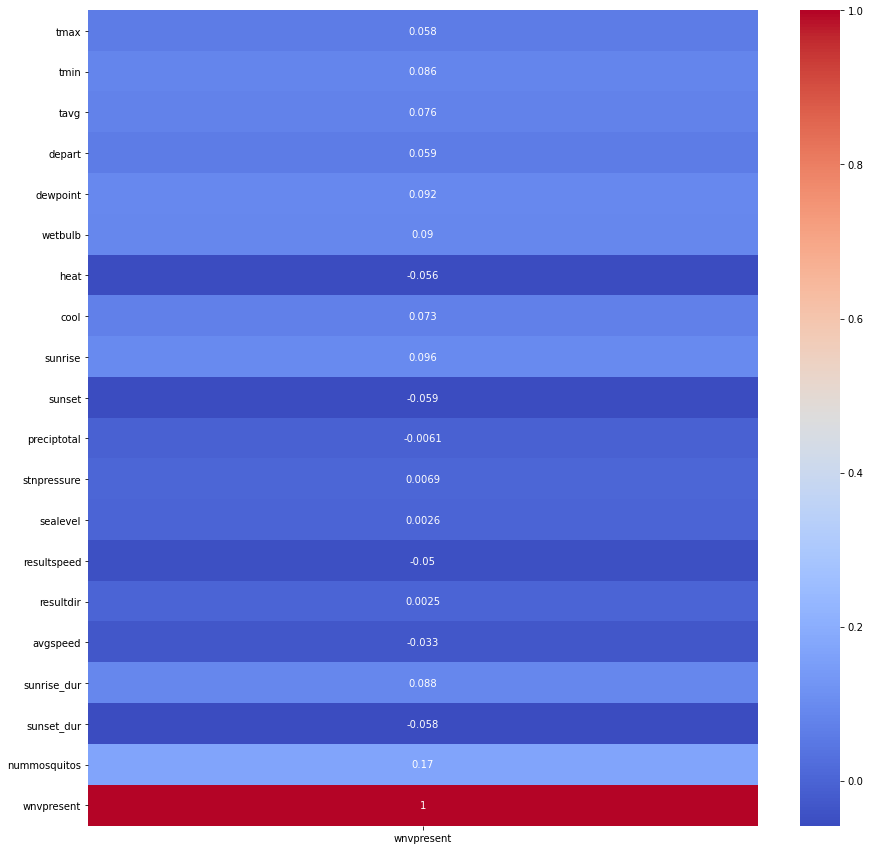

In [80]:
plt.figure(figsize=(15,15))
sns.heatmap(comb_df[['tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'preciptotal',
       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed',
       'sunrise_dur', 'sunset_dur','nummosquitos','wnvpresent']].corr()[['wnvpresent']], annot=True, cmap='coolwarm')

In [81]:
comb_df[['tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'preciptotal',
       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed',
       'sunrise_dur', 'sunset_dur','nummosquitos']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17220 entries, 0 to 17219
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tmax          17220 non-null  int64  
 1   tmin          17220 non-null  int64  
 2   tavg          17220 non-null  int64  
 3   depart        17220 non-null  float64
 4   dewpoint      17220 non-null  int64  
 5   wetbulb       17220 non-null  float64
 6   heat          17220 non-null  int64  
 7   cool          17220 non-null  int64  
 8   sunrise       17220 non-null  int64  
 9   sunset        17220 non-null  int64  
 10  preciptotal   17220 non-null  float64
 11  stnpressure   17220 non-null  float64
 12  sealevel      17220 non-null  float64
 13  resultspeed   17220 non-null  float64
 14  resultdir     17220 non-null  int64  
 15  avgspeed      17220 non-null  float64
 16  sunrise_dur   17220 non-null  int64  
 17  sunset_dur    17220 non-null  int64  
 18  nummosquitos  17220 non-nu

<AxesSubplot:xlabel='nummosquitos', ylabel='Count'>

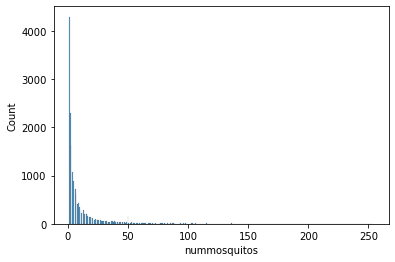

In [82]:
sns.histplot(comb_df['nummosquitos'])

In [83]:
def plot_spray(df, spray):
    fig, axes = plt.subplots(ncols=2, figsize=(16,10))
    df_2011 = df.loc[df['year'] == 2011,:]
    df_2013 = df.loc[df['year'] == 2013,:]
    spray_2011 = spray.loc[spray['year'] == 2011,:]
    spray_2013 = spray.loc[spray['year'] == 2013,:]
    
    origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
    upperRight = [42.1, -87.5]          # lat/long of upper right corner

    mapdata = np.loadtxt("./assets/mapdata_copyright_openstreetmap_contributors.txt")

    # intersection = [41.909614, -87.746134]  # co-ordinates of intersection of IL64 / IL50 according to Google Earth


    # generate plot
    axes[0] = plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]], )
    axes[0] = plt.scatter(x=spray_2011['longitude'], y=spray_2011['latitude'], c='r', s=20)
    axes[0] = plt.scatter(x=df_2011['longitude'], y=df_2011['latitude'], c='b', s=30, marker='o')
    
    
    axes[1] = plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
    axes[1] = plt.scatter(x=spray_2013['longitude'], y=spray_2013['latitude'], c='r', s=20)
    axes[1] = plt.scatter(x=df_2013['longitude'], y=df_2013['latitude'], c='b', s=30, marker='o')
    plt.show()


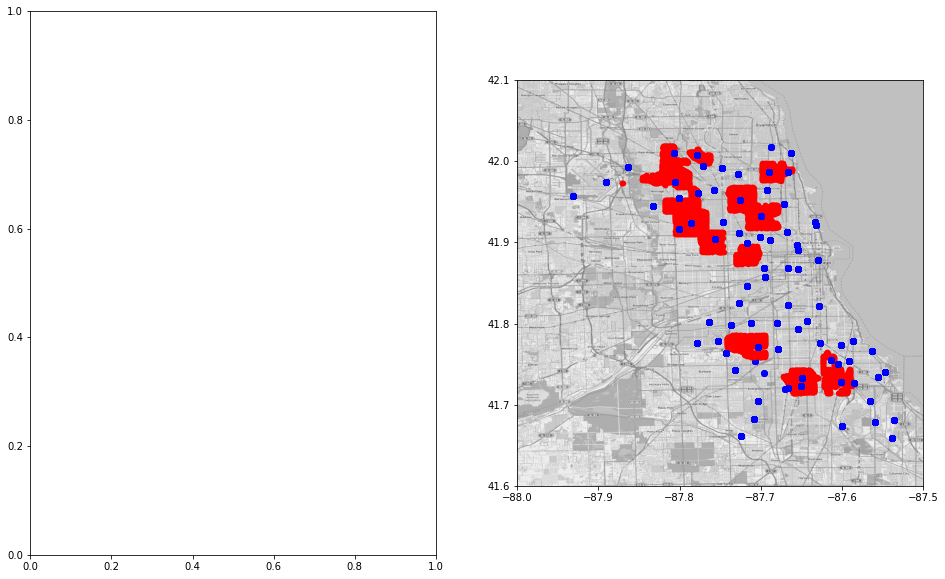

In [84]:
plot_spray(comb_df, spray_clean)

In [85]:
# spray_clean['date'].unique()
comb_df['nummosquitos'].unique()

array([  1,   2,   3,   5,   4,   8,   9,  10,   7,   6,  20,  25,  19,
        16,  28,  12,  11,  15,  14,  93,  22,  21,  29,  89,  27,  18,
        13,  39,  51,  17,  34,  30,  26,  52,  50,  76,  42, 118,  32,
        53,  55,  83, 106,  94, 102, 161,  23,  24, 140,  33,  36,  69,
        41,  65,  67,  71,  57,  66,  82,  72,  46,  88, 178,  43, 114,
        77, 103,  44,  35, 100, 134,  48,  54,  70, 116, 107, 162,  56,
        62,  31,  45,  37, 155,  49,  60, 137, 143, 135,  58,  84, 138,
        63,  80,  79,  74,  38,  68, 157, 171,  98, 124,  81, 158, 121,
       104,  85,  40,  59,  61,  47,  91,  73, 128,  99,  75, 127, 164,
        92, 139, 204,  97, 136, 131,  86,  64,  96, 113, 194, 115, 130,
       123, 150, 112, 105, 110, 154,  78,  87, 168, 119,  95, 196, 117,
       149, 126, 167, 188, 146, 147, 109, 254, 169, 165, 184, 122, 101,
       198,  90, 216, 129, 192], dtype=int64)

In [86]:
sample = comb_df.loc[(comb_df['species'].isin(['CULEX PIPIENS/RESTUANS','CULEX PIPIENS','CULEX RESTUANS'])) & (comb_df['wnvpresent'] == 1)]

In [87]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17220 entries, 0 to 17219
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    17220 non-null  datetime64[ns]
 1   address                 17220 non-null  object        
 2   species                 17220 non-null  object        
 3   block                   17220 non-null  int64         
 4   street                  17220 non-null  object        
 5   trap                    17220 non-null  object        
 6   addressnumberandstreet  17220 non-null  object        
 7   latitude                17220 non-null  float64       
 8   longitude               17220 non-null  float64       
 9   addressaccuracy         17220 non-null  int64         
 10  wnvpresent              17220 non-null  int64         
 11  day                     17220 non-null  int64         
 12  month                   17220 non-null  int64 

In [88]:
# hist of preciptotal, stnpressure, sealevel, resultspeed, resultdir, avgspeed, depart, dewpoint, wetbulb
# barchart, wnvpresent vs weather phenomena

<AxesSubplot:xlabel='wetbulb', ylabel='Count'>

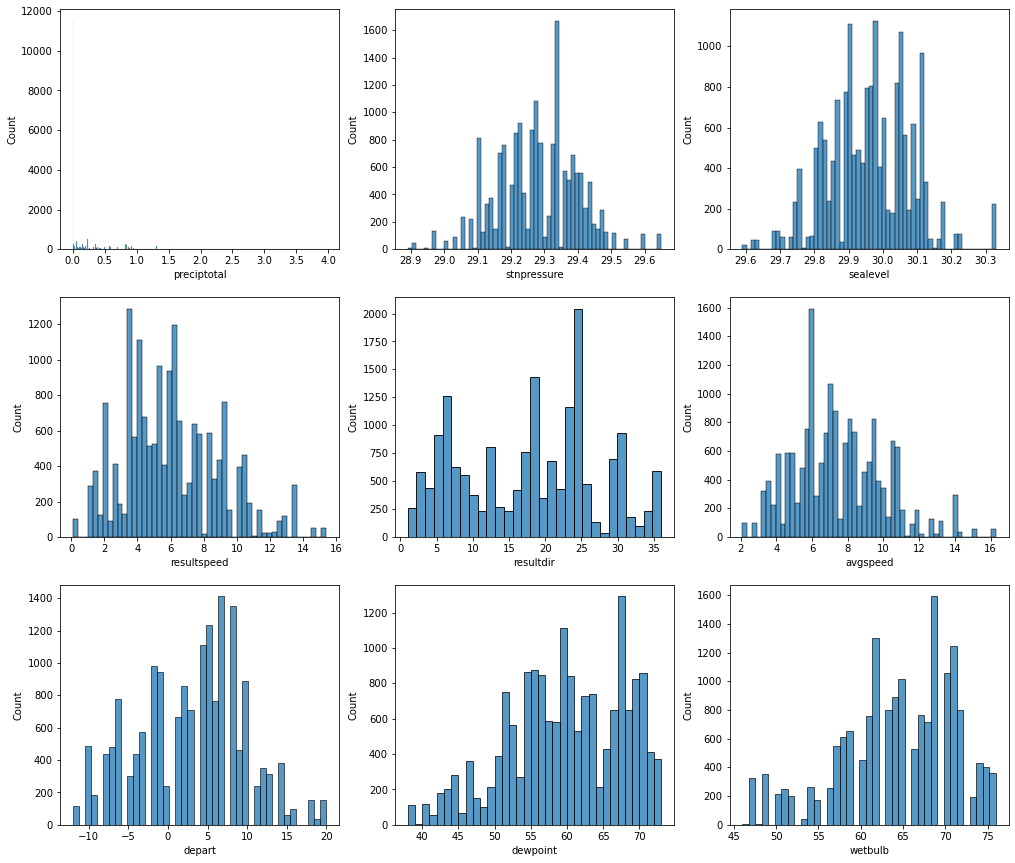

In [89]:
# consider making functional version?
col_lst = ['preciptotal','stnpressure','sealevel','resultspeed','resultdir','avgspeed','depart','dewpoint','wetbulb']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,15))
sns.histplot(data=comb_df, x='preciptotal',ax=axes[0][0])
sns.histplot(data=comb_df, x='stnpressure',ax=axes[0][1])
sns.histplot(data=comb_df, x='sealevel',ax=axes[0][2])
sns.histplot(data=comb_df, x='resultspeed',ax=axes[1][0])
sns.histplot(data=comb_df, x='resultdir',ax=axes[1][1])
sns.histplot(data=comb_df, x='avgspeed',ax=axes[1][2])
sns.histplot(data=comb_df, x='depart',ax=axes[2][0])
sns.histplot(data=comb_df, x='dewpoint',ax=axes[2][1])
sns.histplot(data=comb_df, x='wetbulb',ax=axes[2][2])

<AxesSubplot:xlabel='preciptotal'>

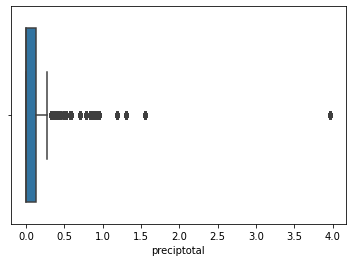

In [90]:
sns.boxplot(data=comb_df, x='preciptotal')

In [91]:
comb_df['preciptotal'].unique()

array([0.        , 0.42      , 0.27      , 0.16      , 0.00807433,
       1.55      , 0.92      , 0.01      , 0.17      , 0.04      ,
       1.31      , 0.06      , 0.09      , 0.05      , 0.46      ,
       0.23      , 0.83      , 0.37      , 0.88      , 0.24      ,
       0.2       , 0.18      , 0.08      , 0.12      , 3.97      ,
       0.87      , 0.14      , 0.19      , 0.02      , 0.03      ,
       0.33      , 0.95      , 1.19      , 0.89      , 0.59      ,
       0.52      , 0.44      , 0.39      , 0.13      , 0.7       ,
       0.36      , 0.79      , 0.11      , 0.5       , 0.84      ,
       0.58      ])

<AxesSubplot:xlabel='wetbulb', ylabel='wnvpresent'>

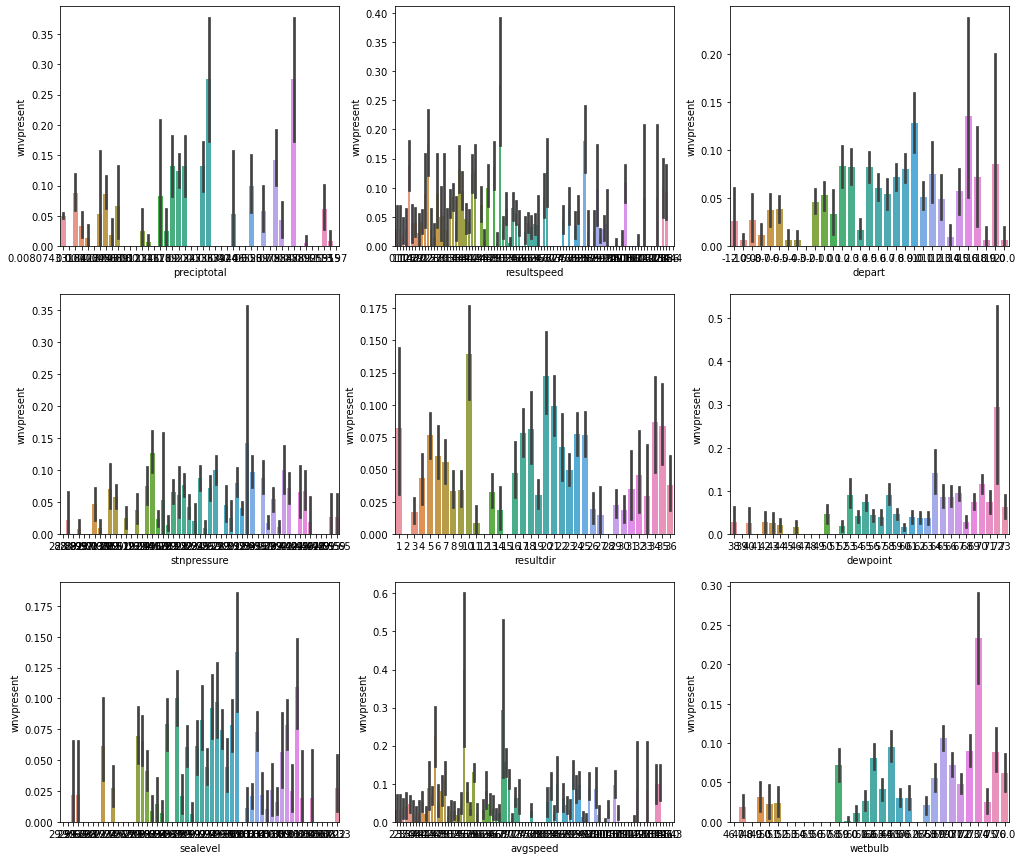

In [92]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,15))
sns.barplot(data=comb_df, x='preciptotal', y='wnvpresent',ax=axes[0][0])
sns.barplot(data=comb_df, x='stnpressure',y='wnvpresent',ax=axes[1][0])
sns.barplot(data=comb_df, x='sealevel', y='wnvpresent',ax=axes[2][0])
sns.barplot(data=comb_df, x='resultspeed', y='wnvpresent',ax=axes[0][1])
sns.barplot(data=comb_df, x='resultdir', y='wnvpresent',ax=axes[1][1])
sns.barplot(data=comb_df, x='avgspeed', y='wnvpresent',ax=axes[2][1])
sns.barplot(data=comb_df, x='depart', y='wnvpresent',ax=axes[0][2])
sns.barplot(data=comb_df, x='dewpoint', y='wnvpresent',ax=axes[1][2])
sns.barplot(data=comb_df, x='wetbulb', y='wnvpresent',ax=axes[2][2])

In [93]:
def check_vs_temp(df, col):
    fig, axes = plt.subplots(ncols=3, figsize=(17,5))
    sns.scatterplot(data=df, x='tavg', y=col, hue='wnvpresent',s=df['nummosquitos'],ax=axes[0])
    sns.scatterplot(data=df, x='tmin',y=col,hue='wnvpresent',s=df['nummosquitos'],ax=axes[1])
    sns.scatterplot(data=df, x='tmax',y=col, hue='wnvpresent',s=df['nummosquitos'],ax=axes[2])

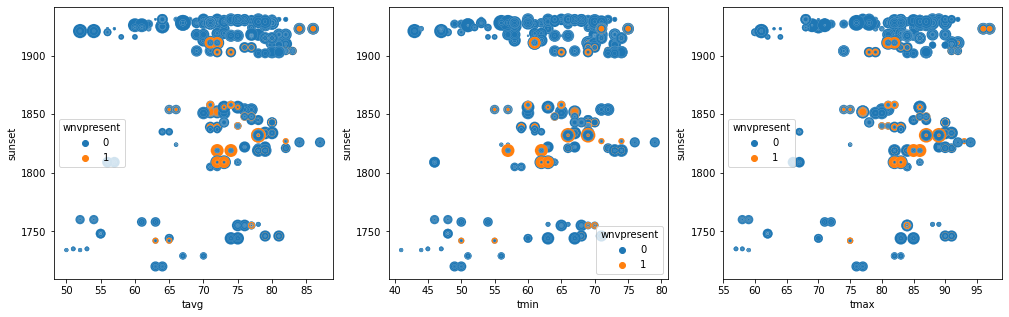

In [94]:
check_vs_temp(comb_df, 'sunset')

In [95]:
def check_vs_sun(df, col):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,8))
    sns.scatterplot(data=df, x='heat', y=col, hue='wnvpresent',s=df['nummosquitos'],ax=axes[0][0])
    sns.scatterplot(data=df, x='cool',y=col,hue='wnvpresent',s=df['nummosquitos'],ax=axes[0][1])
    sns.scatterplot(data=df, x='sunrise',y=col, hue='wnvpresent',s=df['nummosquitos'],ax=axes[1][0])
    sns.scatterplot(data=df, x='sunset',y=col, hue='wnvpresent',s=df['nummosquitos'],ax=axes[1][1])

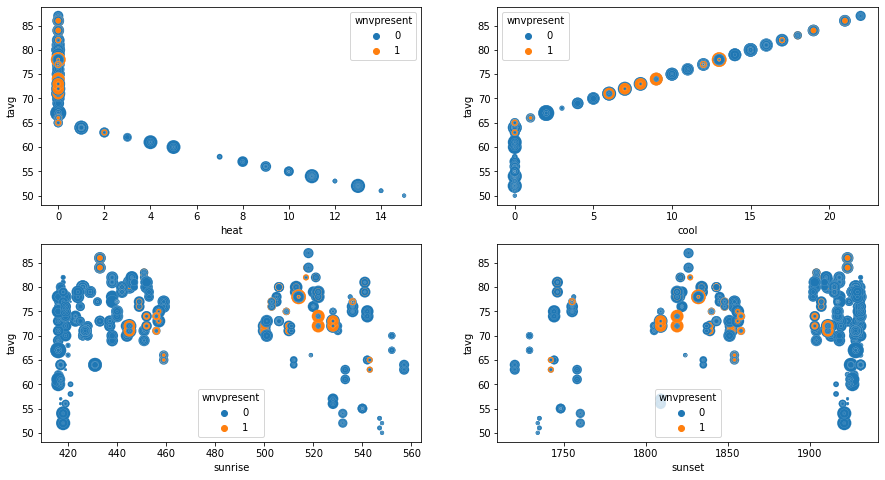

In [96]:
check_vs_sun(comb_df, 'tavg')

## Feature Engineering

In [97]:
# pipiens / restuans only have west nile virus

# Modelling

# Conclusion